# Lab 7 - Breadth-First-Search
## Ryley Powell
## CS3851 - 021

# Introduction
The objective of the lab is to explore the usage of graphs and the Breath-First Search algorithm. Using the BFS algorithm, we constuct a set of recommendations from a given set of connected vertices, and test the execution time when modifiying limitations to the depth the algorithm is able to search the underlying tree structure.

# Testing

In [2]:
import graphs
import time as t

max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
number_of_edges = []
execution_times = []
precisions = []
recalls = []

training, testing = graphs.load_data('training_set.tsv', 'testing_set.tsv')
for m in max_depth:
    print('Running Trial: ', m)
    start = t.clock()
    recommendations = graphs.recommend_all_friends(training, m)
    stop = t.clock()

    number_of_edges.append(recommendations.count_edges())
    execution_times.append(stop - start)
    precisions.append(graphs.precision(recommendations, testing))
    recalls.append(graphs.recall(recommendations,testing))

print(max_depth)
print(number_of_edges)
print(execution_times)
print(precisions)
print(recalls)

Running Trial:  1
Running Trial:  2
Running Trial:  3
Running Trial:  4
Running Trial:  5
Running Trial:  6
Running Trial:  7
Running Trial:  8
Running Trial:  9
Running Trial:  10
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 153388, 366032, 522192, 560034, 569388, 571250, 571488, 571546, 571552]
[2.529962100000006, 4.168478800000003, 8.077771600000005, 8.36671560000002, 7.723761199999984, 7.374095699999998, 7.2380177, 7.317712, 7.171416800000003, 7.159292899999997]
[0.0, 0.017863196599473233, 0.007644140403024872, 0.0053658424487544815, 0.00500326765874929, 0.004921073152226601, 0.004905032822757112, 0.0049029900890307405, 0.004902492537783486, 0.004902441072728291]
[0.0, 0.9764789736279401, 0.9971489665003563, 0.9985744832501782, 0.9985744832501782, 0.9985744832501782, 0.9985744832501782, 0.9985744832501782, 0.9985744832501782, 0.9985744832501782]


C:\ProgramData\Anaconda3\envs\lab1\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]
C:\ProgramData\Anaconda3\envs\lab1\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  from ipykernel import kernelapp as app


# Data Plots
## Max Depth vs. Number of Edges

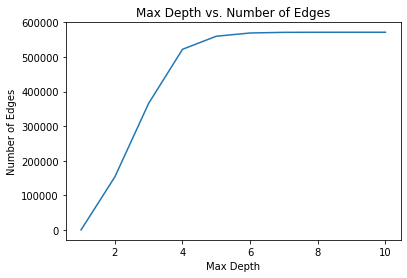

In [3]:
import matplotlib.pyplot as mat
mat.figure(0)
mat.plot(max_depth, number_of_edges)
mat.xlabel('Max Depth')
mat.ylabel('Number of Edges')
mat.title('Max Depth vs. Number of Edges')
mat.show()

## Max Depth vs. Execution Times

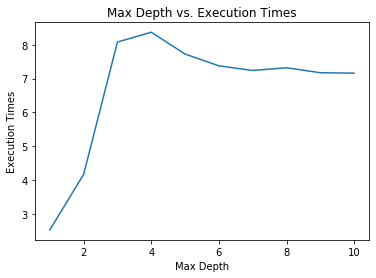

In [4]:
mat.figure(1)
mat.plot(max_depth, execution_times)
mat.xlabel('Max Depth')
mat.ylabel('Execution Times')
mat.title('Max Depth vs. Execution Times')
mat.show()

## Max Depth vs. Precision

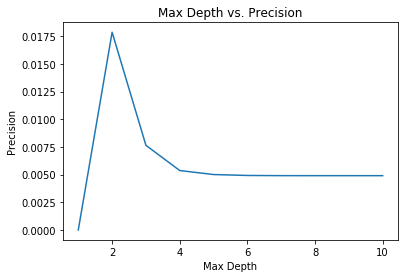

In [5]:
mat.figure(2)
mat.plot(max_depth, precisions)
mat.xlabel('Max Depth')
mat.ylabel('Precision')
mat.title('Max Depth vs. Precision')
mat.show()

## Max Depth vs. Recall

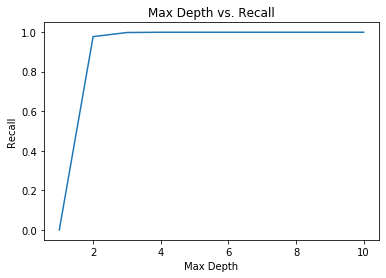

In [6]:
mat.figure(3)
mat.plot(max_depth, recalls)
mat.xlabel('Max Depth')
mat.ylabel('Recall')
mat.title('Max Depth vs. Recall')
mat.show()

# Questions
## 1. Does the number of recommendations plateau after a certain max depth? If so, what is the max_depth? Why do you think this happens?
Yes. At max_depth = 6, the difference in recommendations returned become very small. The reason for this is likely similar to the concept of "6 Degrees of Seperation", where the number of edges a given vertex *V* in a set of vertices to other vertices, such as vertex *U* that does share an edge with *V*, rapidly decreases the number edges needed to find a path from *V* to *U*. In other words, it highly depends on the number of edges between vertices.
## 2. Does precision increase or decrease as the max depth increases? Why do you think this is?
Precision decreases as the max depth increases. Precision is measuring the percentage of recommendations that are in the defined test set, and we can see that at even max_depth = 1, the number of recommendations produced, or rather the number of edges in the graph, is roughly 54.6 times greater than the length of the defined test set.
## 3. Does the recall increase or decrease as the max depth increases? Why do you think this is?
Recall increases as the max depth increases. Recall is measuring the percentage of elements within the defined test set are present in the recommendations produced. 
## 4. Our stated goal is to generate an initial set of recommendations which we can further filter with another algorithm. If we needed to compare all users, we would have 784 * 786 = 614,656 pairs to look at. What value would you choose for the max_depth to achieve this goal based on your analyses above?
The max depth to search through 614,656 pairs entirely depends on the number of edges each vertex in the set has. For example, if each vertex in the set has an average of 7-8 edges, then only a max depth of 6 would be needed (6^7 = 279,936 and 6^8 = 1,679,616).

In [9]:
print('The average number of edges each vertex in the training set is ', training.count_edges() / len(training._edges.keys()), " edges.")

The average number of edges each vertex in the training set is  32.19642857142857  edges.


As seen from the above statement, the average number of edges for each vertex is about 32.19 in this given dataset. Therefore we can find the appropriate max-depth by taking logarithm, base 32, of 614,656, resulting in a max-depth value of 3.84, which rounded would be 4.
## 5. Why is breadth-first search more appropriate than depth-first search for this problem?
BFS is more appropriate over DFS because of the goal of the problem. In this problem, we're not looking for a particular recommendation, but rather an entire set of recommendations. In general terms, we're not looking for a specific path from one vertex *V* to vertex *U*, but rather all connecting paths stemming from a given vertex *V*.
## 6. Why did we need to modify the breath-first search to limit the depth?
The BFS is modified with a limit on depth because of performance reasons.

In [12]:
import sys
start = t.clock()
no_limit = graphs.recommend_all_friends(training, sys.maxsize)
stop = t.clock()
print('Not limiting the BFS through a maximum depth returns ', no_limit.count_edges(), ' recommendations, and executes in ', stop - start, ' seconds.')

C:\ProgramData\Anaconda3\envs\lab1\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\ProgramData\Anaconda3\envs\lab1\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


Not limiting the BFS through a maximum depth returns  571552  recommendations, and executes in  7.764920100000381  seconds.


As seen in the above statement, by supplying a max_depth of effectively infinity, the number of recommendations produced is the same as a max-depth of 10 for this given dataset, and the speed at which is perform the BFS is only slightly slower.